In [266]:
# Getting Data from GitHub
!wget --no-check-certificate \
    https://github.com/omidmno2/stockMarketPrediction_DL/raw/main/tse_en.csv \
    -o /tmp/tse_en.csv

In [267]:
# Import required libraries
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [268]:
# Select the desired symbol
df = pd.read_csv("tse_en.csv")
df[df.Symbol == "سشرق"].head()

,Date,Symbol,Name,Yesterday,Open,Last,Close,Close Changes,Low,High,Number Traded,Volume,Value Traded
375,2008-12-10,سشرق,سيمان‌ شرق‌,4146,4022,4022,4022,-124,4022.0,4022.0,1,10,40220
1096,2008-12-22,سشرق,سيمان‌ شرق‌,4022,3902,3902,4022,0,3902.0,3902.0,1,500,1951000
1390,2008-12-24,سشرق,سيمان‌ شرق‌,4022,3902,3902,3902,-120,3902.0,3902.0,1,100,390200
2451,2009-01-10,سشرق,سيمان‌ شرق‌,3902,3785,3785,3785,-117,3785.0,3785.0,1,1500,5677500
2500,2009-01-11,سشرق,سيمان‌ شرق‌,3785,3672,3672,3785,0,3672.0,3672.0,1,509,1869048


In [269]:
# Data cleaning
data = df[df.Symbol == "سشرق"]
data.index = pd.to_datetime(data['Date'])
data = data.drop(columns=['Symbol', 'Name', 'Date']).dropna()
data = data.head(2350)

In [270]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

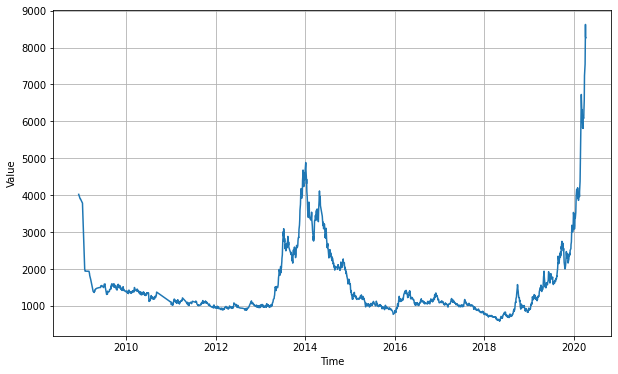

In [271]:
# Data plotting
series = np.array(data["Last"])
time = np.array(data.index)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [272]:
# Installing required libraries for Technical Analysis
!pip install ta
!pip install pandas_ta

In [273]:
import ta
#https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#volatility-indicators
#data = ta.add_all_ta_features(data, open="Open", high="High", low="Low", close="Close", volume="Volume")

import pandas_ta
#https://github.com/twopirllc/pandas-ta

#import talib
#https://github.com/mrjbq7/ta-lib
#https://ta-lib.org/function.html

In [274]:
# I1 = xo(t), Open Price
open_price = []
for i in range(len(data)-19):
    open_price.append(data.Open[i:i+20])
    
# I2 = xh(t), High Price
high_price = []
for i in range(len(data)-19):
    high_price.append(data.High[i:i+20])
    
# I3 = xl(t), Low Price
low_price = []
for i in range(len(data)-19):
    low_price.append(data.Low[i:i+20])
    
# I4 = x(t), Close Price
close_price = []
for i in range(len(data)-19):
    close_price.append(data.Last[i:i+20])
    
# I5 = MA5, Moving Average 5
ma5 = []
indicator_ma5 = ta.trend.SMAIndicator(close=data.Last, window=5)
indicator_ma5 = indicator_ma5.sma_indicator()
for i in range(len(data)-19):
    ma5.append(indicator_ma5[i:i+20])

#  I6 = MA10, Moving Average 10
ma10 = []
indicator_ma10 = ta.trend.SMAIndicator(close=data.Last, window=10)
indicator_ma10 = indicator_ma10.sma_indicator()
for i in range(len(data)-19):
    ma10.append(indicator_ma10[i:i+20])
    
# I7 = MA20,  Moving Average 20
ma20 = []
indicator_ma20 = ta.trend.SMAIndicator(close=data.Last, window=20)
indicator_ma20 = indicator_ma20.sma_indicator()
for i in range(len(data)-19):
    ma20.append(indicator_ma20[i:i+20])
    
# I8 = BIAS5, BIAS5
bias5 = []
indicator_bias5 = pandas_ta.bias(close=data.Last, length=5)
for i in range(len(data)-19):
    bias5.append(indicator_bias5[i:i+20])
    
# I9 = BIAS10, BIAS10
bias10 = []
indicator_bias10 = pandas_ta.bias(close=data.Last, length=10)
for i in range(len(data)-19):
    bias10.append(indicator_bias10[i:i+20])
    
# I10 DIFF EMA12-EMA26
diff = []
indicator_ema12 = ta.trend.EMAIndicator(close=data.Last, window=12)
indicator_ema12 = indicator_ema12.ema_indicator()
indicator_ema26 = ta.trend.EMAIndicator(close=data.Last, window=26)
indicator_ema26 = indicator_ema26.ema_indicator()
indicator_diff = indicator_ema12 - indicator_ema26
for i in range(len(data)-19):
    diff.append(indicator_diff[i:i+20])
    
# I11 = BU, (x(t)-bollinger upper)/bollinger upper
bu = []
indicator_bbu = pandas_ta.bbands(close=data.Last)['BBU_5_2.0']
indicator_bu = (data.Last - indicator_bbu) / indicator_bbu
for i in range(len(data)-19):
    bu.append(indicator_bu[i:i+20])
    
# I12 = BL, (x(t)-bollinger lower)/bollinger lower
bl = []
indicator_bbl = pandas_ta.bbands(close=data.Last)['BBL_5_2.0']
indicator_bl = (data.Last - indicator_bbl) / indicator_bbl
for i in range(len(data)-19):
    bl.append(indicator_bl[i:i+20])

# I13 = K, Stochastic Fast %K
k = []
indicator_k = ta.momentum.stochrsi_k(close=data.Last)
for i in range(len(data)-19):
    k.append(indicator_k[i:i+20])
    
# I14 = D, Stochastic Fast %D
d = []
indicator_d = ta.momentum.stochrsi_d(close=data.Last)
for i in range(len(data)-19):
    d.append(indicator_d[i:i+20])

# I15 = ROC, Price rate of change
roc = []
indicator_roc = ta.momentum.ROCIndicator(close=data.Last)
indicator_roc = indicator_roc.roc()
for i in range(len(data)-19):
    roc.append(indicator_roc[i:i+20])
    
# I16 = TR, True range of price movements
tr = []
indicator_tr = pandas_ta.true_range(high=data.High, low=data.Low, close=data.Last)
for i in range(len(data)-19):
    tr.append(indicator_tr[i:i+20])

# I17 = MTM6, Momentum 6
mtm6 = []
indicator_mtm6 = pandas_ta.mom(close=data.Last)
for i in range(len(data)-19):
    mtm6.append(indicator_mtm6[i:i+20])

# I18 = MTM12, Momentum 12
mtm12 = []
indicator_mtm12 = pandas_ta.mom(close=data.Last)
for i in range(len(data)-19):
    mtm12.append(indicator_mtm12[i:i+20])
    
# I19 = WR%10, Williams index %10
wr10 = []
indicator_wr10 = ta.momentum.WilliamsRIndicator(high=data.High, low=data.Low, close=data.Last, lbp=10)
indicator_wr10 = indicator_wr10.williams_r()
for i in range(len(data)-19):
    wr10.append(indicator_wr10[i:i+20])
    
# I20 = WR%5, Williams index %5
wr5 = []
indicator_wr5 = ta.momentum.WilliamsRIndicator(high=data.High, low=data.Low, close=data.Last, lbp=5)
indicator_wr5 = indicator_wr5.williams_r()
for i in range(len(data)-19):
    wr5.append(indicator_wr5[i:i+20])

# I21 = OSC6, Oscillator 6
osc6 = []
indicator_osc6 = ta.momentum.AwesomeOscillatorIndicator(high=data.High, low=data.Low, window1=6)
indicator_osc6 = indicator_osc6.awesome_oscillator()
for i in range(len(data)-19):
    osc6.append(indicator_osc6[i:i+20])
    
# I22 = OSC12, Oscillator12
osc12 = []
indicator_osc12 = ta.momentum.AwesomeOscillatorIndicator(high=data.High, low=data.Low, window1=12)
indicator_osc12 = indicator_osc12.awesome_oscillator()
for i in range(len(data)-19):
    osc12.append(indicator_osc12[i:i+20])
    
# I23 = RSI6, Relative strength index 6
rsi6 = []
indicator_rsi6 = ta.momentum.RSIIndicator(close=data.Last, window=6)
indicator_rsi6 = indicator_rsi6.rsi()
for i in range(len(data)-19):
    rsi6.append(indicator_rsi6[i:i+20]) 
    
# I24 = RSI12, Relative strength index 12
rsi12 = []
indicator_rsi12 = ta.momentum.RSIIndicator(close=data.Last, window=12)
indicator_rsi12 = indicator_rsi12.rsi()
for i in range(len(data)-19):
    rsi12.append(indicator_rsi12[i:i+20]) 

# I25 = PSY, Psychological line
psy = []
indicator_psy = pandas_ta.psl(close=data.Last, open=data.Open)
for i in range(len(data)-19):
    psy.append(indicator_psy[i:i+20]) 
    
# I26, K(t)-K(t-1)
i26 = []
indicator_i26 = ta.momentum.stochrsi_k(close=data.Last.shift(-1)) - ta.momentum.stochrsi_k(close=data.Last)
for i in range(len(data)-19):
    i26.append(indicator_i26[i:i+20])
    
# I27, D(t)-D(t-1)
i27 = []
indicator_i27 = ta.momentum.stochrsi_d(close=data.Last.shift(-1)) - ta.momentum.stochrsi_d(close=data.Last)
for i in range(len(data)-19):
    i27.append(indicator_i27[i:i+20])

# I28, (x(t)-x(t-1))/x(t-1)
i28 = []
indicator_i28 = (data.Last.shift(-1) - data.Last) / data.Last
for i in range(len(data)-19):
    i28.append(indicator_i28[i:i+20])
    
# I29, (x(t)-xo(t))/xo(t)
i29 = []
indicator_i29 = (data.Last - data.Open) / data.Open
for i in range(len(data)-19):
    i29.append(indicator_i29[i:i+20])
    
# I30, (x(t)-xl(t))/(xh(t)- xl(t))
i30 = []
indicator_i30 = (data.Last - data.Low) / (data.High - data.Low)
for i in range(len(data)-19):
    i30.append(indicator_i30[i:i+20])
    
# I31, (MA5(t)-MA5(t-1))/MA5(t-1)
i31 = []
ma5_t = ta.trend.SMAIndicator(close=data.Last.shift(-1), window=5).sma_indicator()
ma5_t_1 = ta.trend.SMAIndicator(close=data.Last, window=5).sma_indicator()
indicator_i31 = (ma5_t - ma5_t_1) / ma5_t_1
for i in range(len(data)-19):
    i31.append(indicator_i31[i:i+20])
    
# I32, (MA20(t)-MA20(t-1))/MA20(t-1)
i32 = []
ma20_t = ta.trend.SMAIndicator(close=data.Last.shift(-1), window=20).sma_indicator()
ma20_t_1 = ta.trend.SMAIndicator(close=data.Last, window=20).sma_indicator()
indicator_i32 = (ma20_t - ma20_t_1) / ma20_t_1
for i in range(len(data)-19):
    i32.append(indicator_i32[i:i+20])
    
# I33, (MA5(t)-MA20(t-1))/MA20(t-1)
i33 = []
indicator_i33 = (ma5_t - ma20_t_1) / ma20_t_1
for i in range(len(data)-19):
    i33.append(indicator_i33[i:i+20])
    
# I34, (x(t)-MA20(t))/MA20(t)
i34 = []
ma20t = ta.trend.SMAIndicator(close=data.Last, window=20).sma_indicator()
indicator_i34 = (data.Last - ma20t) / ma20t
for i in range(len(data)-19):
    i34.append(indicator_i34[i:i+20])
    
# I35, (x(t)-min(x(t-1),x(t-2),...,x(t-N)))/ min(x(t),x(t-1),x(t-2),...,x(t-N))
i35 = []
max_list = []
min_list = []
for i in range(1, len(data)):
    max_list.append(data.Last.shift(-i).max())
    min_list.append(data.Last.shift(-i).min())
mini = np.array(min_list).min()
maxi = np.array(max_list).max()
indicator_i35 = (data.Last - mini) / mini
for i in range(len(data)-19):
    i35.append(indicator_i35[i:i+20])
    
# I36, (x(t)-max(x(t-1),x(t-2),...,x(t-N)))/ max(x(t),x(t-1),x(t-2),...,x(t-N))
i36 = []
indicator_i36 = (data.Last - maxi) / maxi
for i in range(len(data)-19):
    i36.append(indicator_i36[i:i+20])

In [275]:
pictures = list()
for i in range(0, len(open_price)):
    pic = pd.DataFrame(index=['day1', 'day2', 'day3', 'day4', 'day5',
                              'day6', 'day7', 'day8', 'day9', 'day10',
                              'day11', 'day12', 'day13', 'day14', 'day15',
                              'day16', 'day17', 'day18', 'day19', 'day20'])
    pic["Open Price"] = np.array(open_price[i:i+1]).transpose()
    pic["High Price"] = np.array(high_price[i:i+1]).transpose()
    pic["Low Price"] = np.array(low_price[i:i+1]).transpose()
    pic["Close Price"] = np.array(close_price[i:i+1]).transpose()
    pic["MA5"] = np.array(ma5[i:i+1]).transpose()
    pic["MA10"] = np.array(ma10[i:i+1]).transpose()
    pic["MA20"] = np.array(ma20[i:i+1]).transpose()
    pic["BIAS5"] = np.array(bias5[i:i+1]).transpose()
    pic["BIAS10"] = np.array(bias10[i:i+1]).transpose()
    pic["DIFF"] = np.array(diff[i:i+1]).transpose()
    pic["BU"] = np.array(bu[i:i+1]).transpose()
    pic["BL"] = np.array(bl[i:i+1]).transpose()
    pic["K"] = np.array(k[i:i+1]).transpose()
    pic["D"] = np.array(d[i:i+1]).transpose()
    pic["ROC"] = np.array(roc[i:i+1]).transpose()
    pic["TR"] = np.array(tr[i:i+1]).transpose()
    pic["MTM6"] = np.array(mtm6[i:i+1]).transpose()
    pic["MTM12"] = np.array(mtm12[i:i+1]).transpose()
    pic["WR%10"] = np.array(wr10[i:i+1]).transpose()
    pic["WR%5"] = np.array(wr5[i:i+1]).transpose()
    pic["OSC6"] = np.array(osc6[i:i+1]).transpose()
    pic["OSC12"] = np.array(osc12[i:i+1]).transpose()
    pic["RSI6"] = np.array(rsi6[i:i+1]).transpose()
    pic["RSI12"] = np.array(rsi12[i:i+1]).transpose()
    pic["PSY"] = np.array(psy[i:i+1]).transpose()
    pic["I26"] = np.array(i26[i:i+1]).transpose()
    pic["I27"] = np.array(i27[i:i+1]).transpose()
    pic["I28"] = np.array(i28[i:i+1]).transpose()
    pic["I29"] = np.array(i29[i:i+1]).transpose()
    pic["I30"] = np.array(i30[i:i+1]).transpose()
    pic["I31"] = np.array(i31[i:i+1]).transpose()
    pic["I32"] = np.array(i32[i:i+1]).transpose()
    pic["I33"] = np.array(i33[i:i+1]).transpose()
    pic["I34"] = np.array(i34[i:i+1]).transpose()
    pic["I35"] = np.array(i35[i:i+1]).transpose()
    pic["I36"] = np.array(i36[i:i+1]).transpose()
    pictures.append(pic.transpose())

In [276]:
len(pictures)

2331

In [277]:
# Algorithm 1
# Labeling (Buy, Sell, Hold)

window_size = 11
counter = 0
bsh_labels = []

window_begin_idx=0
window_end_idx=0
window_middle_idx=0

min_idx=0
max_idx=0
number=0.0
mins=10000.0
maxs=0.0
while counter < len(data.Last):
    if counter > window_size:
        window_begin_idx = counter - window_size
        window_end_idx = window_begin_idx + window_size - 1
        window_middle_idx = (window_begin_idx + window_end_idx)//2
        for i in range(window_begin_idx, window_end_idx+1):
            number = data.Last[i]
            if number < mins:
                mins=number
                min_idx = np.where(data.Last==mins)[0][0]
            if number > maxs:
                maxs=number
                max_idx = np.where(data.Last==maxs)[0][0]
        if max_idx == window_middle_idx:
            bsh_labels.append(0) #SELL
        elif min_idx == window_middle_idx:
            bsh_labels.append(1) #BUY
        else:
            bsh_labels.append(2) #HOLD  
        mins = 10000.0
        maxs = 0.0
    counter+=1

In [278]:
len(bsh_labels)

2338

In [279]:
len(data.Last)

2350

In [280]:
len(data.Last) - len(bsh_labels)
# You should remove 6 rows from head and 6 rows from tail of data or actualy pictures.
# After checking, it was found that this difference is due to the fact that 6 lines from the top and 6 lines from the bottom have been removed.
# شش تای اول و شش تای آخر حذف میشوند موقع درست کردن لیبل

12

In [281]:
bsh_labels = bsh_labels[13:]
pictures = pictures[:-6]
print(len(bsh_labels))
print(len(pictures))

2325
2325


In [282]:
pictures = pictures[40:]
bsh_labels = bsh_labels[40:]

In [283]:
# This part of code belongs to Dimension Reduction with PCA. Also there is another way to reduse dimensions which name is (2D)square_PCA, but I couldn't find how to use it.

from sklearn.decomposition import PCA

In [284]:
for i in range(len(pictures)):
    x = pictures[i].replace([np.inf, -np.inf], np.nan).fillna(0)

    pca = PCA(n_components=10)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents)

    x = principalDf.transpose()

    pca = PCA(n_components=10)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents)

    pictures[i] = principalDf

In [285]:
pictures[100]

,0,1,2,3,4,5,6,7,8,9
0,14049.968114,0.017867,0.001906,0.000402,0.000117,0.000074,0.000060,0.000006,-0.000004,1.286090e-13
1,-1561.886484,320.493669,4.458809,0.813893,0.228368,0.142239,0.113905,0.011491,-0.007198,1.286090e-13
2,-1561.167000,-49.771162,147.172652,5.048071,1.189315,0.704926,0.544725,0.053490,-0.033333,1.286090e-13
3,-1561.036953,-41.169492,-30.734987,85.330030,4.976020,2.477078,1.723897,0.157784,-0.097080,1.286090e-13
4,-1560.999733,-39.228897,-22.834111,-24.022112,56.135163,8.833554,4.532004,0.357060,-0.214493,1.286090e-13
5,-1560.988402,-38.673915,-21.176799,-17.280278,-26.354656,40.378132,8.990495,0.580114,-0.339497,1.286090e-13
6,-1560.980618,-38.301685,-20.171095,-14.487263,-13.115348,-27.788211,27.731278,1.016191,-0.566150,1.286090e-13
7,-1560.970834,-37.843822,-19.034764,-12.040861,-8.038955,-8.900408,-17.114853,18.451363,-3.521231,1.286090e-13
8,-1560.969537,-37.783950,-18.893677,-11.777239,-7.646633,-8.164775,-14.093679,-14.479637,-11.428305,1.286090e-13
9,-1560.968552,-37.738613,-18.787933,-11.584645,-7.373392,-7.682609,-12.427832,-6.147861,16.207290,1.286090e-13


In [286]:
# Divide the data into training and validation data
split_time = 2000
y_train = bsh_labels[:split_time]
x_train = pictures[:split_time]
y_valid = bsh_labels[split_time:]
x_valid = pictures[split_time:]

In [287]:
y_train = np.array(y_train)
x_train = np.array(x_train)
y_valid = np.array(y_valid)
x_valid = np.array(x_valid)

In [288]:
y_train = tf.keras.utils.to_categorical(y_train, 3)
y_valid = tf.keras.utils.to_categorical(y_valid, 3)

In [289]:
# Create and train the model
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(10, 10, 1)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), verbose=1)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 8, 8, 32)          320       
                                                                 
 conv2d_65 (Conv2D)          (None, 6, 6, 64)          18496     
                                                                 
 conv2d_66 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 conv2d_67 (Conv2D)          (None, 2, 2, 128)         147584    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 1, 1, 128)        0         
 g2D)                                                            
                                                                 
 dropout_32 (Dropout)        (None, 1, 1, 128)         0         
                                                     

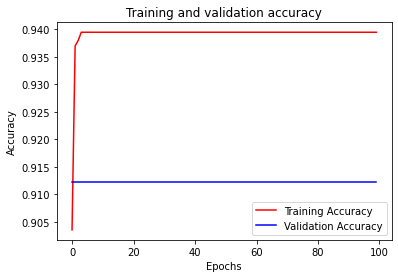

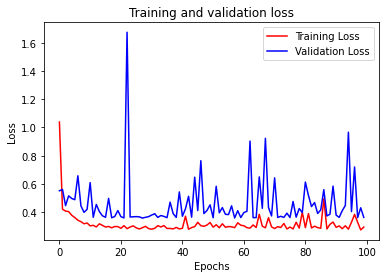

In [290]:
# Ploting accuracy and loss diagrams
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure().add_subplot(xlabel='Epochs', ylabel='Accuracy')
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)

plt.figure().add_subplot(xlabel='Epochs', ylabel='Loss')
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()

In [291]:
# Test Up and Down labeling method

In [292]:
data.head()

,Yesterday,Open,Last,Close,Close Changes,Low,High,Number Traded,Volume,Value Traded
Date,,,,,,,,,,
2008-12-10,4146,4022,4022,4022,-124,4022.0,4022.0,1,10,40220
2008-12-22,4022,3902,3902,4022,0,3902.0,3902.0,1,500,1951000
2008-12-24,4022,3902,3902,3902,-120,3902.0,3902.0,1,100,390200
2009-01-10,3902,3785,3785,3785,-117,3785.0,3785.0,1,1500,5677500
2009-01-11,3785,3672,3672,3785,0,3672.0,3672.0,1,509,1869048


In [293]:
# labeling Up or Down

ud_labels = []

for i in range(1, len(data.Last)):
    if data.Last[i] < data.Last[i-1]:
        ud_labels.append(0) # 0 = Down
    else:
        ud_labels.append(1) # 1 = Up
        
# This method miss first row from data, you should remove first row then train it

In [294]:
ud_labels = ud_labels[58:-6]
len(ud_labels)

2285

In [295]:
len(pictures)

2285

In [296]:
# Divide the data into training and validation data
split_time = 2000
y_train = ud_labels[:split_time]
x_train = pictures[:split_time]
y_valid = ud_labels[split_time:]
x_valid = pictures[split_time:]

y_train = np.array(y_train)
x_train = np.array(x_train)
y_valid = np.array(y_valid)
x_valid = np.array(x_valid)

#y_train = tf.keras.utils.to_categorical(y_train, 2)
#y_valid = tf.keras.utils.to_categorical(y_valid, 2)

In [297]:
# Create and train the model
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(10, 10, 1)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='softmax')
])

model.summary()

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), verbose=1)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 8, 8, 32)          320       
                                                                 
 conv2d_69 (Conv2D)          (None, 6, 6, 64)          18496     
                                                                 
 conv2d_70 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 conv2d_71 (Conv2D)          (None, 2, 2, 128)         147584    
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 1, 1, 128)        0         
 g2D)                                                            
                                                                 
 dropout_34 (Dropout)        (None, 1, 1, 128)         0         
                                                     

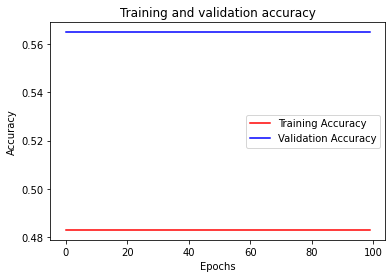

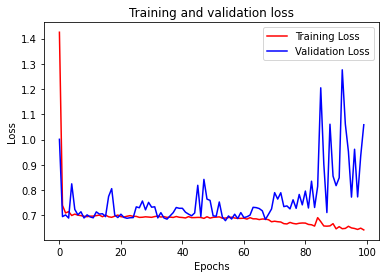

In [298]:
# Ploting accuracy and loss diagrams
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure().add_subplot(xlabel='Epochs', ylabel='Accuracy')
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)

plt.figure().add_subplot(xlabel='Epochs', ylabel='Loss')
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()